# ДЗ 1, часть 2. Теория информации

Имя, Фамилия: Вадим Палысаев

группа: 223

**Оценка(для проверяющего):** 0 из 10

**Дедлайн:** одновременно с частью 3

In [50]:
#all imports here please
import math
import pickle as pkl

from collections import Counter, OrderedDict
import heapq

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#... add your own if necessary

Энтропию можно использовать не только для описания хаотичности, беспорядочности и уровня неопределённости, но и для того, чтобы исследовать зависимость между случайными величинами, используя теорию информации. Начнём с базовых вещей и постепенно дойдём до ультрапопулярной эвристики выбора важных признаков для машинного обучения -- взаимной информации.

## Задача 1. Поисследуем энтропию (2 балла)

Будем предполагать, что нам даны две случайных величины $X,Y$, можете предполагать, что они дискретные или имеют плотности, выкладок этот факт не изменит, но делайте всё по одному стандарту: укажите ниже и придерживайтесь его на всём протяжении ДЗ, если явно не просят сделать иначе.

**Choose your weapon/Выберите ваше оружие/Сhoisissez votre arme/Изаберите себи оружje:**  

$$
\int .. dx  ~~  \text{или} ~~ \sum_i  ~~\text{(выберите одно)}
$$  

### Независимость?

Покажите, что если две случайных величины $X,Y$ независимы, то $H(X,Y)=H(X)+H(Y)$.

Имейте в виду, что слева под знаком энтропии ДВЕ случайных величины, рассматриваемых как 2d-вектор, поэтому матожидание берётся по их совместному закону распределения. Это называется *совместной энтропией* величин $X,Y$.

Запишем определение энтропии:

####Энтропия X и Y:
$ X $ и $ Y $ — дискретные случайные величины с распределениями вероятностей $ P(X) $ и $ P(Y) $, тогда их энтропии:

$$
H(X) = -\sum_{x} P(X=x) \log P(X=x)
$$

$$
H(Y) = -\sum_{y} P(Y=y) \log P(Y=y)
$$

####Совместная энтропия $ H(X, Y) $:
Совместная энтропия $ H(X, Y) $ двух случайных величин $ X $ и $ Y $, рассматриваемых как 2d-вектор, определяется по их совместному закону распределения $ P(X, Y) $:

$$
H(X, Y) = -\sum_{x, y} P(X=x, Y=y) \log P(X=x, Y=y)
$$

Если $ X $ и $ Y $ независимы, то их совместное распределение $ P(X, Y) $ можно разложить как произведение маргинальных распределений:

$$
P(X=x, Y=y) = P(X=x) \cdot P(Y=y)
$$

\

###Доказательство $H(X, Y) = H(X) + H(Y)$:

Подставим это в определение совместной энтропии:

$$
H(X, Y) = -\sum_{x, y} P(X=x) P(Y=y) \log (P(X=x) P(Y=y))
$$

Раскроем логарифм произведения:

$$
H(X, Y) = -\sum_{x, y} P(X=x) P(Y=y) \left(\log P(X=x) + \log P(Y=y)\right)
$$

\

Теперь разделим сумму:

$$
H(X, Y) = -\sum_{x} P(X=x) \log P(X=x) \sum_{y} P(Y=y) - \sum_{y} P(Y=y) \log P(Y=y) \sum_{x} P(X=x)
$$

\

Так как $\sum_{y} P(Y=y) = 1$ и $\sum_{x} P(X=x) = 1$, то:

$$
H(X, Y) = -\sum_{x} P(X=x) \log P(X=x) - \sum_{y} P(Y=y) \log P(Y=y)
$$

то есть:

$$
H(X, Y) = H(X) + H(Y)
$$

ч.т.д.


### Зависимость?

Покажите, что в общем случае

$$
H(X,Y) = H(X) + H(Y \vert X)
$$
и вычислите, чему будет равен остаток $H(Y \vert X)$. Он носит название *условной энтропии*, не путайте с энтропией условного распределения.

####Запишем определение условной энтропия

Условная энтропия $ H(Y|X) $ измеряет неопределённость величины $ Y $, если значение $ X $ уже известно. Она определяется как:

$$
H(Y|X) = -\sum_{x, y} P(X=x, Y=y) \log P(Y=y|X=x)
$$

\

###Доказательство $ H(X, Y) = H(X) + H(Y|X) $:

Рассмотрим совместную энтропию:

$$
H(X, Y) = -\sum_{x, y} P(X=x, Y=y) \log P(X=x, Y=y)
$$

\

Используя правило произведения вероятностей, $ P(X=x, Y=y) = P(X=x) \cdot P(Y=y|X=x) $, подставим это в выражение:

$$
H(X, Y) = -\sum_{x, y} P(X=x, Y=y) \log \left( P(X=x) \cdot P(Y=y|X=x) \right)
$$

Раскроем логарифм произведения:

$$
H(X, Y) = -\sum_{x, y} P(X=x, Y=y) \left( \log P(X=x) + \log P(Y=y|X=x) \right)
$$

\

Разделим это выражение на две части:

$$
H(X, Y) = -\sum_{x, y} P(X=x, Y=y) \log P(X=x) - \sum_{x, y} P(X=x, Y=y) \log P(Y=y|X=x)
$$

Первая часть:

$$
-\sum_{x, y} P(X=x, Y=y) \log P(X=x) = -\sum_{x} P(X=x) \log P(X=x) = H(X)
$$

Вторая часть:

$$
-\sum_{x, y} P(X=x, Y=y) \log P(Y=y|X=x) = H(Y|X)
$$

\

Таким образом, мы получаем:

$$
H(X, Y) = H(X) + H(Y|X)
$$

ч.т.д.

!! Обоснуйте, какой может быть физический смысл $H(Y\vert X)$ (что она измеряет?) с точки зрения теории кодирования в случае дискретных СВ $X,Y$.

Условная энтропия $ H(Y|X) $ — это мера того, сколько неопределённости остаётся относительно величины $ Y $, если значение величины $ X $ уже известно. Другими словами, это показывает, сколько дополнительной информации нужно, чтобы точно определить $ Y $, зная $ X $.

В контексте кодирования информации, условная энтропия $ H(Y|X) $ — это среднее количество битов, которые придётся добавить для кодирования значений $ Y $, если мы уже знаем $ X $.

Например, представьте, что мы хотим передать информацию о двух переменных $ X $ и $ Y $. Если $ X $ уже известна, то $ H(Y|X) $ помогает сократить длину сообщения, потому что часть информации о $ Y $ уже подсказана значением $ X $.

## Задача 2. Взаимная информация (2 балла)

Можно рассмотреть разницу

$$
I(X,Y) = H(X) - H(X \vert Y),
$$

которая отражает в некотором смысле (вы наверняка об этом думали в окошке выше) уровень использования информации о значении $Y$ при кодировании $X$ (если мы о кодировании). Эта величина носит название *взаимной информации* и является ещё одним хорошим способом исследования зависимости между случайными величинами. Библиотека `sklearn` позволяет оценивать её по данным и тем самым выделять самые важные признаки для моделей машинного обучения.

### Симметричность

Докажите, что $I(X,Y)=I(Y,X)$.

Для доказательства симметричности, давайте выразим взаимную информацию через совместную и условные энтропии:

####Взаимная информация:

$$
I(X, Y) = H(X) - H(X|Y),
$$

$$
I(Y, X) = H(Y) - H(Y|X).
$$

\

Теперь выразим ее как разность между суммой энтропий $ H(X) + H(Y) $ и совместной энтропией $ H(X, Y) $:

$$
I(X, Y) = H(X) + H(Y) - H(X, Y)
$$

\

Используя это определение, легко видеть, что выражение для $ I(X, Y) $ и $ I(Y, X) $ совпадают, так как совместная энтропия $ H(X, Y) $ симметрична относительно $ X $ и $ Y $, т.е. $ H(X, Y) = H(Y, X) $:

Вероятность совместного события $ P(X=x, Y=y) $ не зависит от порядка, в котором мы рассматриваем случайные величины $ X $ и $ Y $. Поэтому $ P(X=x, Y=y) = P(Y=y, X=x) $:

$$
H(X, Y) = -\sum_{x, y} P(X=x, Y=y) \log P(X=x, Y=y) = -\sum_{y, x} P(Y=y, X=x) \log P(Y=y, X=x) = H(Y, X)
$$

\

Таким образом, из симметричности совместной энтропии следует, что

$$
I(X, Y) = H(X) + H(Y) - H(X, Y) = I(Y, X)
$$

Это доказывает, что взаимная информация симметрична, т.е:

$$ I(X, Y) = I(Y, X) $$

ч.т.д.

### Связь с KL

Докажите, что $I(X,Y)= D_{KL}( p_{X,Y} \vert p_{X}p_{Y})$. Слева совместное распределение $X,Y$, справа -- произведение вероятностей(или плотностей) $X,Y$.

Выпишем и проанализируем определение дивергенции Кульбака-Лейблера:

Дивергенция Кульбака-Лейблера $ D_{KL}(p_{X,Y} | p_X p_Y) $ измеряет расстояние между совместным распределением $ p_{X,Y} $ и произведением распределений $ p_X $ и $ p_Y $:

$$
D_{KL}(p_{X,Y} \| p_X p_Y) = \sum_{x, y} p_{X,Y}(x, y) \log \frac{p_{X,Y}(x, y)}{p_X(x) p_Y(y)}
$$

\

Теперь раскроем логарифм в выражении для $ D_{KL}(p_{X,Y} \| p_X p_Y) $:

$$
D_{KL}(p_{X,Y} \| p_X p_Y) = \sum_{x, y} p_{X,Y}(x, y) \left( \log p_{X,Y}(x, y) - \log (p_X(x) p_Y(y)) \right)
$$

\

Разделим на два слагаемых:

$$
D_{KL}(p_{X,Y} \| p_X p_Y) = \sum_{x, y} p_{X,Y}(x, y) \log p_{X,Y}(x, y) - \sum_{x, y} p_{X,Y}(x, y) \left( \log p_X(x) + \log p_Y(y) \right)
$$

Первое слагаемое является отрицательной совместной энтропией:

$$
\sum_{x, y} p_{X,Y}(x, y) \log p_{X,Y}(x, y) = -H(X, Y)
$$

\

Второе слагаемое можно разделить на два отдельных выражения, каждое из которых является энтропией $ X $ и $ Y $:

$$
\sum_{x, y} p_{X,Y}(x, y) \log p_X(x) = -H(X)
$$

и

$$
\sum_{x, y} p_{X,Y}(x, y) \log p_Y(y) = -H(Y)
$$

тогда:

$$
D_{KL}(p_{X,Y} \| p_X p_Y) = H(X) + H(Y) - H(X, Y) = I(X, Y)
$$

\

Следовательно образом, мы доказали, что

$$
I(X, Y) = D_{KL}(p_{X,Y} \| p_X p_Y)
$$

ч.т.д.


### Какой смысл?..

Как вы думаете, как интерпретируется $I(X,Y)$ в терминах теории кодирования (при дискретных $X,Y$)? Что измеряет эта величина?

В терминах теории кодирования взаимная информация $ I(X, Y) $ показывает, сколько информации о величине $ X $ можно узнать, зная $ Y $ (и наоборот).

Она измеряет, насколько знание одной величины уменьшает неопределённость относительно другой. Если $ X $ и $ Y $ тесно связаны, то знание $ Y $ сильно уменьшит неопределённость $ X $, и взаимная информация будет высокой. Если же $ X $ и $ Y $ независимы, то взаимная информация равна нулю, так как знание $ Y $ не даёт никаких данных о $ X $.

В задачах кодирования это позволяет сократить количество битов, нужных для передачи информации о двух величинах, поскольку часть информации уже заложена в зависимости между ними.

## Максимальная энтропия (3 балла)

### Экспоненциальное распределение

(1 балл) Вычислите энтропию для экспоненциального распределения $Exp(\lambda)$ и распределения Лапласа $Laplace(0,\lambda)$, имеющее плотность $\frac{\lambda}{2} e^{-\lambda \vert x\vert }$.

###Энтропия экспоненциального распределения $ \text{Exp}(\lambda) $:

Пусть $ X \sim \text{Exp}(\lambda) $ с плотностью вероятности:

$$
f_X(x) = \lambda e^{-\lambda x}, \quad x \geq 0
$$

Энтропия для непрерывной случайной величины $ X $ определяется как:

$$
H(X) = -\int_{-\infty}^{\infty} f_X(x) \log f_X(x) \, dx
$$

\

Теперь подставим плотность:

$$
H(X) = -\int_{0}^{\infty} \lambda e^{-\lambda x} \log(\lambda e^{-\lambda x}) \, dx
$$

Разложим логарифм:

$$
H(X) = -\int_{0}^{\infty} \lambda e^{-\lambda x} \left( \log \lambda - \lambda x \right) \, dx
$$

\

Разделим интеграл на два слагаемых:

$$
H(X) = -\int_{0}^{\infty} \lambda e^{-\lambda x} \log \lambda \, dx + \int_{0}^{\infty} \lambda e^{-\lambda x} \lambda x \, dx
$$

Первый интеграл:

$$
-\log \lambda \int_{0}^{\infty} \lambda e^{-\lambda x} \, dx = -\log \lambda
$$

Второй интеграл:

$$
\lambda \int_{0}^{\infty} x \lambda e^{-\lambda x} \, dx = \frac{1}{\lambda}
$$

\

Тогда энтропия экспоненциального распределения равна:

$$
H(X) = 1 + \log \frac{1}{\lambda} = 1 - \log \lambda
$$

\

###Энтропия распределения Лапласа $ \text{Laplace}(0, \lambda) $

Пусть $ Y \sim \text{Laplace}(0, \lambda) $ с плотностью вероятности:

$$
f_Y(y) = \frac{\lambda}{2} e^{-\lambda |y|}
$$

Энтропия для распределения Лапласа выглядит так:

$$
H(Y) = -\int_{-\infty}^{\infty} f_Y(y) \log f_Y(y) \, dy
$$

\

Теперь подставим плотность $ f_Y(y) $:

$$
H(Y) = -\int_{-\infty}^{\infty} \frac{\lambda}{2} e^{-\lambda |y|} \log \left( \frac{\lambda}{2} e^{-\lambda |y|} \right) \, dy
$$

И раскроем логарифм:

$$
H(Y) = -\int_{-\infty}^{\infty} \frac{\lambda}{2} e^{-\lambda |y|} \left( \log \frac{\lambda}{2} - \lambda |y| \right) \, dy
$$

\

Разделю интеграл на два слагаемых:

$$
H(Y) = -\log \frac{\lambda}{2} \int_{-\infty}^{\infty} \frac{\lambda}{2} e^{-\lambda |y|} \, dy + \int_{-\infty}^{\infty} \frac{\lambda}{2} e^{-\lambda |y|} \cdot \lambda |y| \, dy
$$

Первый интеграл:

$$
-\log \frac{\lambda}{2}
$$

А второй равен:

$$
\frac{2}{\lambda}
$$

Энтропия распределения Лапласа:

$$
H(Y) = 1 + \log \frac{2}{\lambda}
$$


(2 балла) Докажите, что Экспоненциальное распределение $Exp(\lambda)$ имеет максимальную энтропию среди всех абсолютно непрерывных вероятностных распределений с фиксированным средним и имеющих ненулевую плотность в области $x\geq 0$.

Для доказательства воспользуемс кросс-энтропией:

Пусть $ p(x) $ — плотность экспоненциального распределения с параметром $ \lambda $, а $ p'(x) $ — плотность произвольного другого распределения, удовлетворяющего заданным условиям.

Кросс-энтропия $ CE(p' | p) $ между этими распределениями определяется как:

$$
CE(p' | p) = - \int_{\mathbb{R}} p'(x) \log p(x) \, dx
$$

\

Плотность экспоненциального распределения имеет вид $ p(x) = \lambda e^{-\lambda x} $ для $ x \geq 0 $. Подставляем эту плотность в выражение для кросс-энтропии:

$$
CE(p' | p) = - \int_{\mathbb{R}} p'(x) \log (\lambda e^{-\lambda x}) \, dx
$$

Разложим логарифм:

$$
CE(p' | p) = - \int_{\mathbb{R}} p'(x) \left( \log \lambda - \lambda x \right) \, dx
$$

Разделим это на два интеграла:

$$
CE(p' | p) = - \int_{\mathbb{R}} p'(x) \log \lambda \, dx + \int_{\mathbb{R}} p'(x) \lambda x \, dx
$$

\

Рассмотрим каждый интеграл отдельно:
Первый интеграл:

$$
-\log \lambda \int_{\mathbb{R}} p'(x) \, dx = -\log \lambda
$$

Второй интеграл учитывает, что $ \int_{\mathbb{R}} p'(x) x \, dx = \frac{1}{\lambda} $, поскольку среднее значение фиксировано:

$$
\lambda \int_{\mathbb{R}} p'(x) x \, dx = \lambda \cdot \frac{1}{\lambda} = 1
$$

Таким образом, мы получаем:

$$
CE(p' | p) = -\log \lambda + 1
$$

Что равно энтропии экспоненциального распределения.

\

По свойству кросс-энтропии:

$$CE(p' | p) \geq H(p') $$

Поэтому:

$$
H(p) = CE(p' | p) \geq H(p')
$$

Это доказывает, что экспоненциальное распределение $ \text{Exp}(\lambda) $ имеет максимальную энтропию среди всех распределений с фиксированным средним и ненулевой плотностью на $ x \geq 0 $.

ч.т.д.


## Строим свой код, основанный на частотах (3 балла)

Представим себе для примера достаточно большую книгу (например, Войну и Мир Льва Николаевича Толстого). Для того, чтобы записывать буквы в кодировке UTF-8 требуется от 2 до 4 байт (каждый 8бит). Но книга -- это не просто какой-то iid равновероятный поток символов, а структурированный текст, структуру которого можно по-разному использовать. К примеру, мы можем задуматься над тем, чтобы сжать её, используя информацию о том, какие символы встречаются чаще: ведь более частые можно кодировать более короткими кодовыми словами, а более редкие -- более длинными.

В этом идея [кода Хаффмана](https://compression.ru/download/articles/huff/huffman_1952_minimum-redundancy-codes.pdf), который мы попробуем поисследовать в самой простой наивной имплементации.

### Вычисляем языковую статистику

Возьмём для примера текст вики-страницы [МО1](http://wiki.cs.hse.ru/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_1)

In [51]:
with open("moText.txt","r", encoding="utf-8") as f:
    MOText = "\n".join(f.readlines())

print(MOText[:180])

== О курсе ==



[[Файл:ML_surfaces.png|280px|borderless|left]]



Курс читается для студентов 3-го курса [https://cs.hse.ru/ami ПМИ ФКН ВШЭ] в 1-2 модулях.



Проводится с 2016 го


Это не сильно большой, но не очень маленький текст.

In [52]:
print(len(MOText))

10001


Вычислите частоту каждого символа, сохранив их в упорядоченный словарь (OrderedDict, пригодится для сортировок)  вида {<символ>: <частота>}.

In [53]:
symFreqs = OrderedDict()
for i in MOText:
    if i in symFreqs:
        symFreqs[i] += 1
    else:
        symFreqs[i] = 1

symFreqs = OrderedDict(sorted(symFreqs.items(), key=lambda item: item[1], reverse=True))

In [54]:
for key,val in symFreqs.items():
    print(f"{key}: {val}")
print(f"In total {len(symFreqs)} unique symbols, max freq= {max([val for val in symFreqs.values()])}")

 : 912

: 525
е: 389
а: 378
о: 369
н: 350
и: 343
t: 305
/: 281
e: 217
s: 197
р: 185
|: 185
с: 180
т: 175
.: 163
л: 159
в: 155
h: 147
a: 145
д: 143
2: 140
o: 140
к: 134
i: 134
r: 125
m: 125
p: 114
м: 106
n: 105
у: 99
:: 96
=: 89
ч: 89
l: 87
п: 85
[: 81
]: 81
0: 77
-: 71
я: 70
ы: 70
c: 67
1: 64
й: 63
u: 59
з: 59
б: 58
П: 57
г: 54
М: 53
_: 52
k: 48
d: 46
g: 44
w: 43
ь: 43
К: 41
И: 38
А: 38
y: 35
ш: 35
,: 33
С: 32
Д: 32
b: 30
v: 30
ц: 29
Б: 29
M: 27
В: 26
f: 24
': 24
*: 21
P: 20
ж: 19
х: 18
+: 18
Р: 17
T: 17
3: 16
5: 16
C: 16
9: 16
ю: 16
Н: 15
6: 15
N: 15
4: 14
О: 13
L: 13
x: 13
S: 13
7: 13
(: 13
): 13
Э: 12
A: 12
R: 12
ф: 12
H: 11
!: 11
З: 11
F: 10
Z: 10
8: 9
G: 9
D: 9
W: 9
Т: 9
E: 8
V: 8
щ: 8
U: 7
q: 7
э: 7
z: 7
J: 7
I: 7
Ф: 6
Ш: 6
Е: 6
K: 6
X: 5
?: 5
B: 5
ё: 5
Y: 5
У: 5
Л: 4
": 4
—: 4
O: 3
@: 3
Я: 3
%: 3
Q: 2
<: 2
{: 2
Г: 2
}: 2
&: 1
>: 1
ъ: 1
Ч: 1
j: 1
Ю: 1
Ж: 1
In total 148 unique symbols, max freq= 912


### Строим Кодер и Декодер Хаффмана

Это хорошее упражнение для ценителей алгоритмов, но давайте сократим себе время и попробуем адаптировать одну из [доступных реализаций](https://www.geeksforgeeks.org/huffman-coding-in-python/) под наш сценарий, обернув в привычную классовую структуру и сохранив максимальную представленность самого алгоритма.

In [55]:
#taken from https://www.geeksforgeeks.org/huffman-coding-in-python/
class Node:
    def __init__(self, symbol=None, frequency=None):
        #print("CREATING", symbol, frequency)
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

def build_huffman_tree(chars, freq):

    # Create a priority queue of nodes
    priority_queue = [Node(char, f) for char, f in zip(chars, freq)]
    heapq.heapify(priority_queue)

    # Build the Huffman tree
    while len(priority_queue) > 1:
        left_child = heapq.heappop(priority_queue)
        right_child = heapq.heappop(priority_queue)
        merged_node = Node(frequency=left_child.frequency + right_child.frequency)
        merged_node.left = left_child
        merged_node.right = right_child
        heapq.heappush(priority_queue, merged_node)

    return priority_queue[0]

def generate_huffman_codes(node, code="", huffman_codes={}):
    if node is not None:
        if node.symbol is not None:
            huffman_codes[node.symbol] = code
        else:
            generate_huffman_codes(node.left, code + "0", huffman_codes)
            generate_huffman_codes(node.right, code + "1", huffman_codes)

    return huffman_codes

def runTest():
    # Given example (try it to test)
    chars = ['a', 'b', 'c', 'd', 'e', 'f']
    freq = [4, 7, 15, 17, 22, 42]

    # Build the Huffman tree
    root = build_huffman_tree(chars, freq)

    # Generate Huffman codes
    huffman_codes = generate_huffman_codes(root)

    # Print Huffman codes
    for char, code in huffman_codes.items():
        print(f"Character: {char}, Code: {code}")

runTest()

Character: f, Code: 0
Character: a, Code: 1000
Character: b, Code: 1001
Character: c, Code: 101
Character: d, Code: 110
Character: e, Code: 111


Надеемся, что этот код заработал.... Теперь напишем кодер, используя эту технологию.

In [56]:
class HuffmanCoderDecoder:

    def __init__(self,symbolProbaTable):
        """_summary_

        Args:
            symbolProbaTable (dict): a dict with symbol(keys) and probabilities (val)
        """
        self.symbols = list(symbolProbaTable.keys())
        self.probas = list(symbolProbaTable.values())
        self.symbolProbaTable = symbolProbaTable
        self.root = None
        self.encoderTable = {}
        self.decoderTable = {}
        self.fit()

    def fit(self):
        """
        Sets up encoder and decoder tables
        """
        self.root = build_huffman_tree(self.symbols, self.probas)
        self.encoderTable = generate_huffman_codes(self.root)
        self.decoderTable = {code: char for char, code in self.encoderTable.items()}

    def encode(self, text):
        """Encodes the text and returns encoded text

        Args:
            text (str): text to encode
        Returns:
            encodedText (str): encoded text
        """
        encodedText = "".join([self.encoderTable[char] for char in text if char in self.encoderTable])
        return encodedText

    def decode(self, text):
        """Decodes the encoded text and returns decoded text

        Args:
            text (str): text to decode
        Returns:
            decodedText (str): decoded text
        """
        decodedText = ""
        code = ""
        for bit in text:
            code += bit
            if code in self.decoderTable:
                decodedText += self.decoderTable[code]
                code = ""
        return decodedText

In [57]:
textSample = MOText[:200]

#Create coder
huff = HuffmanCoderDecoder(symFreqs)
#Encode text
#YOUR CODE
encText = huff.encode(textSample)
#decode text to check if it works
#YOUR CODE
decText = huff.decode(encText)

In [58]:
print(encText)

1011100101110000011111010000000011111101111110011101111111000001011100101110001000100010001001001001100100111101100000110100011000100011110111011110001111101101111111000011101000100010010111101100110111010011101111101111010100101111111011101111011101011001001011101110010110111111111111011101101101100100010011101011000101111011000111101001011101101011110111101011101011001010110101111011101100111000010011001001100010001000100010010011010110111111001110111100010110111010010110011010111001011001011110110101000011011100011011010100010111110110011011110110111110010101101100110001000100000011001110111000111110011100000000111111011111100111011111101000010010010111101000010000111111011101011011100110001100001110111101010010101111011101011110110010100101100100010110001110100101001010000011111011111110000111110100011101100000100110100010010110001111000101101101011111011010101001100000100010000001101001110000101110001111001110000110111101111100011011010101110011110010101000100010001001111101111001

In [59]:
print(decText)

== О курсе ==



[[Файл:ML_surfaces.png|280px|borderless|left]]



Курс читается для студентов 3-го курса [https://cs.hse.ru/ami ПМИ ФКН ВШЭ] в 1-2 модулях.



Проводится с 2016 года.



'''Лектор:'''


In [60]:
print(textSample)

== О курсе ==



[[Файл:ML_surfaces.png|280px|borderless|left]]



Курс читается для студентов 3-го курса [https://cs.hse.ru/ami ПМИ ФКН ВШЭ] в 1-2 модулях.



Проводится с 2016 года.



'''Лектор:'''


Вычислите, какое получилось сжатие

In [61]:
print("Compression(%): ",len(textSample.encode('utf-8'))*8/len(encText)*100)

Compression(%):  180.43654001616815


Поздравляем, вы сделали простой алгоритм сжатия) .... если у вас больше 100%

### Исследуем, как хорошо себя ведёт код при смене текста

Сравните написанный кодер на двух понравившихся вам текстах на разные темы (возьмите по масштабу что-то похожее на страницу МО).

1. Для чистоты эксперимента очистите оба текста от символов, которых нет в другом тексте
2. Посчитайте таблицу частот для каждого из текстов
3. Обучите кодер на тексте 1
4. Обучите кодер на тексте 2
5. Сопоставьте длину (в битах):
   1. Текст1, закодированный кодером 1
   2. Текст2, закодированный кодером 1
   3. Текст1, закодированный кодером 2
   4. Текст2, закодированный кодером 2
6. Посчитайте KL-дивергенцию и кроссэнтропию в обе стороны между частотами кодера1 и кодера2

Прокомментируйте результат.

Не забудьте приложить к решению ваших два текстовых файла.

In [62]:
with open("text1.txt","r", encoding="utf-8") as f:
    text1 = "\n".join(f.readlines())[:10001]
with open("text2.txt","r", encoding="utf-8") as f:
    text2 = "\n".join(f.readlines())[:10001]

In [68]:
common_chars = set(text1) & set(text2)
text1_clean = ''.join([char for char in text1 if char in common_chars])
text2_clean = ''.join([char for char in text2 if char in common_chars])

In [69]:
def compute_symbol_freqs(text):
    sym_freqs = {}
    for char in text:
        if char in sym_freqs:
            sym_freqs[char] += 1
        else:
            sym_freqs[char] = 1
    return sym_freqs

sym_freqs_text1 = compute_symbol_freqs(text1_clean)
sym_freqs_text2 = compute_symbol_freqs(text2_clean)

sym_freqs_text1 = OrderedDict(sorted(sym_freqs_text1.items()))
sym_freqs_text2 = OrderedDict(sorted(sym_freqs_text2.items()))

In [80]:
huffman_coder1 = HuffmanCoderDecoder(sym_freqs_text1)
encoded_text1_by_coder1 = huffman_coder1.encode(text1_clean)
encoded_text2_by_coder1 = huffman_coder1.encode(text2_clean)

huffman_coder2 = HuffmanCoderDecoder(sym_freqs_text2)
encoded_text1_by_coder2 = huffman_coder2.encode(text1_clean)
encoded_text2_by_coder2 = huffman_coder2.encode(text2_clean)

len_encoded_text1_by_coder1 = len(encoded_text1_by_coder1)
len_encoded_text2_by_coder1 = len(encoded_text2_by_coder1)

len_encoded_text1_by_coder2 = len(encoded_text1_by_coder2)
len_encoded_text2_by_coder2 = len(encoded_text2_by_coder2)

In [81]:
def compute_probabilities(sym_freqs):
    total = sum(sym_freqs.values())
    return {char: freq / total for char, freq in sym_freqs.items()}

prob_text1 = compute_probabilities(sym_freqs_text1)
prob_text2 = compute_probabilities(sym_freqs_text2)

In [82]:
def compute_entropy(prob_dist):
    return -sum(p * np.log2(p) for p in prob_dist.values())

H_text1 = compute_entropy(prob_text1)
H_text2 = compute_entropy(prob_text2)

In [83]:
def compute_cross_entropy(p_true, p_model):
    return -sum(p_true[char] * np.log2(p_model.get(char, 1e-10)) for char in p_true)

def compute_kl_divergence(p_true, p_model):
    return sum(p_true[char] * np.log2(p_true[char] / p_model.get(char, 1e-10)) for char in p_true)

CE_text1_text2 = compute_cross_entropy(prob_text1, prob_text2)
CE_text2_text1 = compute_cross_entropy(prob_text2, prob_text1)

KL_text1_text2 = compute_kl_divergence(prob_text1, prob_text2)
KL_text2_text1 = compute_kl_divergence(prob_text2, prob_text1)


print(f"KL(text1 | text2) = {KL_text1_text2}")
print(f"KL(text2 | text1) = {KL_text2_text1}")
print(f"CE(text1 | text2) = {CE_text1_text2}")
print(f"CE(text2 | text1) = {CE_text2_text1}")
print(f"H(text1) = {H_text1}")
print(f"H(text2) = {H_text2}")

KL(text1 | text2) = 0.15577056166462147
KL(text2 | text1) = 0.13482257246679835
CE(text1 | text2) = 5.304440397956053
CE(text2 | text1) = 5.321322817184973
H(text1) = 5.148669836291432
H(text2) = 5.186500244718178


In [84]:
print(f"Coding with text1: text1Len={len_encoded_text1_by_coder1}, text2Len={len_encoded_text2_by_coder1}")
print(f"Coding with text2: text1Len={len_encoded_text1_by_coder2}, text2Len={len_encoded_text2_by_coder2}")

Coding with text1: text1Len=51631, text2Len=53298
Coding with text2: text1Len=52969, text2Len=51929


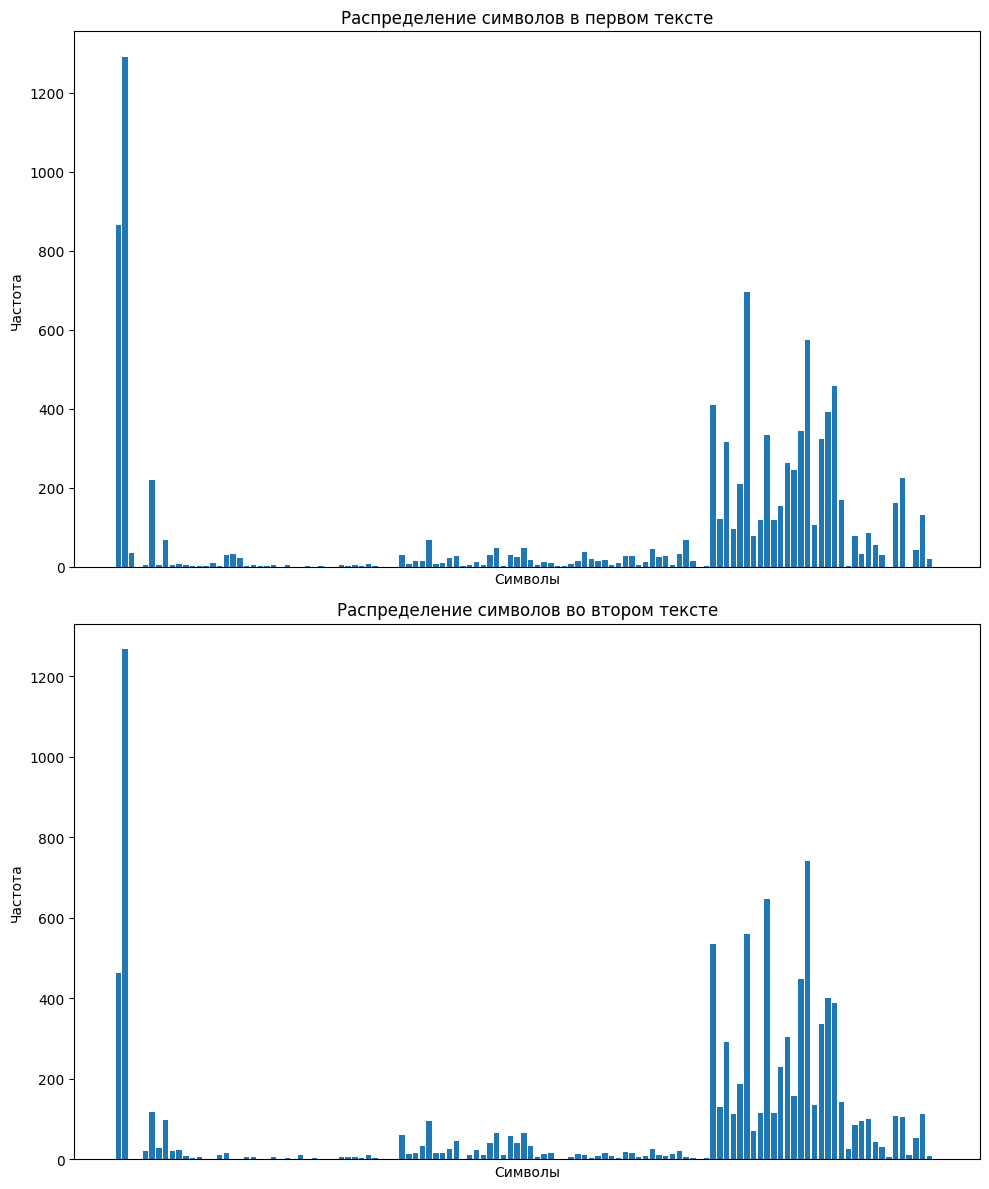

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

chars1 = list(sym_freqs_text1.keys())
freqs1 = [sym_freqs_text1[char] for char in chars1]

chars2 = list(sym_freqs_text2.keys())
freqs2 = [sym_freqs_text2[char] for char in chars2]

ax[0].bar(chars1, freqs1)
ax[0].set_title('Распределение символов в первом тексте')
ax[0].set_xlabel('Символы')
ax[0].set_ylabel('Частота')
ax[0].set_xticks([])

ax[1].bar(chars2, freqs2)
ax[1].set_title('Распределение символов во втором тексте')
ax[1].set_xlabel('Символы')
ax[1].set_ylabel('Частота')
ax[1].set_xticks([])

plt.tight_layout()
plt.show()

ВАШИ КОММЕНТАРИИ ЗДЕСЬ

Энтропии текстов text1 и text2 немного различаются, это говорит о разной степени неопределённости в символах каждого текста.

Наш кодер обучен на первоначальном тексте и для сжатия этого же текста он работает более эффективно, чем для моих двух выбранных текстов так как структура кодера оптимизирована под частоты символов именно первоначального текста. Однако качество все равно близкое.

KL-дивергенция и кросс-энтропия показывают, что распределения символов в текстах не полностью совпадают, хотя и похожи.
На графиках видно, что распределение символов схоже поскольку тексты которые я выбрал это произведения на русском языке (в общем то как и страница вики которую мы брали).